### Introduction

So far, we've learned how to use the pandas library and how to create visualizations with data sets that didn't require much cleanup. However, most data sets in real life require extensive cleaning and manipulation to extract any meaningful insights. In fact, Forbes estimates that data scientists spend about 60% of their time cleaning and organizing data, so it's critical to be able to manipulate data quickly and efficiently.

In this course, we'll learn the following:
- Data aggregation
- How to combine data
- How to transform data
- How to clean strings with pandas
- How to handle missing and duplicate data

You'll need some basic knowledge of pandas and matplotlib to complete this course, including:
- Basic knowledge of pandas dataframes and series
- How to select values and filter a dataframe
- Knowledge of data exploration methods in pandas such as the `info` and `head` methods
- How to create visualizations in pandas and matplotlib

In this course, we'll work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0-10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

Throughout this course, we'll work to answer the following questions:
- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

In this mission, we'll start by learning how to aggregate data. Then in the following missions, we'll learn different data cleaning skills that can help us aggregate and analyze the data in different ways. We'll start by learning each topic in isolation, but build towards a more complete data cleaning workflow by the end of the course.

### Introduction to the Data

Let's start by looking at the World Happiness Report for 2015.

The dataset is a CSV file called `World_Happiness_2015.csv`. Below are descriptions for some of the the columns we'll be working with:

- `Country` - Name of the country.
- `Region` - Name of the region the country belongs to.
- `Happiness Rank` - The rank of the country, as determined by its happiness score.
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- `Family` - The estimated extent to which family contributes to the happiness score.
- `Freedom` - The estimated extent to which freedom contributes to the happiness score.
- `Generosity` - The estimated extent to which generosity contributes to the happiness score.

To start, let's read our data set into a pandas dataframe and inspect it.

---
1. Use the `pd.read_csv()` function to read the `World_Happiness_2015.csv` file into a dataframe called `happiness2015`.
2. Store the first five rows of the dataframe in a variable called `first_5`.
3. Use the `DataFrame.info()` method to print information about the dataframe.
4. Run the code and get familiar with the data.

In [1]:
import pandas as pd
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
first_5 = happiness2015[:5]
first_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        5 non-null      object 
 1   Region                         5 non-null      object 
 2   Happiness Rank                 5 non-null      int64  
 3   Happiness Score                5 non-null      float64
 4   Standard Error                 5 non-null      float64
 5   Economy (GDP per Capita)       5 non-null      float64
 6   Family                         5 non-null      float64
 7   Health (Life Expectancy)       5 non-null      float64
 8   Freedom                        5 non-null      float64
 9   Trust (Government Corruption)  5 non-null      float64
 10  Generosity                     5 non-null      float64
 11  Dystopia Residual              5 non-null      float64
dtypes: float64(9), int64(1), object(2)
memory usage: 608.0

### Using Loops to Aggregate Data

First, let's visualize the happiness score of each country in `happiness2015`:

<AxesSubplot:title={'center':'Happiness Score'}>

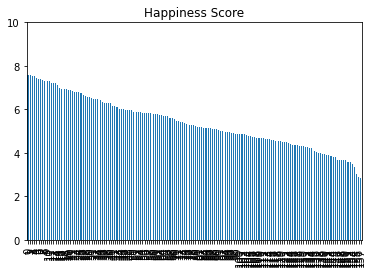

In [4]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Score', ylim=(0,10))

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

You may have noticed that each country in the `happiness2015` dataframe is assigned to a region, specified in the `Region` column. We can use the `Series.unique()` method to confirm the unique regions:

In [5]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Let's try plotting just one region next:

<AxesSubplot:title={'center':'Southern Asia Happiness Scores'}, ylabel='Country'>

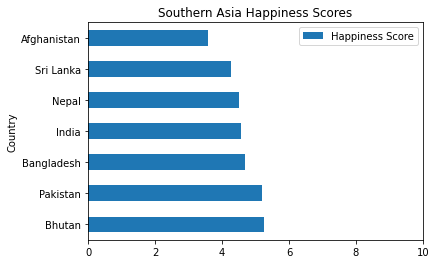

In [7]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

It's much easier to read this visualization - we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is to create a visualization that uses one number, a summary statistic like the mean, to summarize the data for each region.

In this mission, we'll learn how to perform different kinds of **aggregations**, applying a statistical operation to groups of our data, and create visualizations like the one above.

Recall that in the Pandas Fundamentals course, we learned a way to use loops for aggregation. Our process looked like this:
- Identify each unique group in the data set.
- For each group:
    - Select only the rows corresponding to that group.
    - Calculate the average for those rows.

Let's use the same process to find the mean happiness score for each region.

---
1. Create an empty dictionary named `mean_happiness` to store the results of this exercise.
2. Use the `Series.unique()` method to create an array of unique values for the `Region` column.
3. Use a for loop to iterate over the unique region values from the `Region` column.
    - Assign the rows belonging to the current region to a variable named `region_group`.
    - Use the `Series.mean()` method to calculate the mean happiness score for `region_group`.
    - Assign the mean value to the `mean_happiness` dictionary, using the region name as the key and the mean happiness score as the value.

In [10]:
mean_happiness = {}
regions = happiness2015['Region'].unique()
for r in regions:
    region_group = happiness2015[happiness2015['Region'] == r]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[r] = region_mean

---
### The GroupBy Operation

Let's break down the code we wrote in the previous screen into three steps:

1. _Split_ the dataframe into groups.
2. _Apply_ a function to each group.
3. _Combine_ the results into one data structure

In [11]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    # 1. Split the dataframe into groups
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure
    mean_happiness[r] = region_mean

As with many other common tasks, pandas has a built-in operation for this process. The `groupby` operation performs the "split-apply-combine" process on a dataframe but condenses it into two steps:

1. Create a GroupBy object.
2. Call a function on the GroupBy object.

The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.

You can think of the `groupby` operation like this. Imagine a dataframe as a structure made of stacking blocks in all different colors and sizes.

You know you'll eventually want to group the blocks according to color instead, but you don't know yet what you want to do with them after. Using the `groupby` process, we would first create a mapping document, the GroupBy object, containing information on how to group the blocks by color and where each block is located in the original structure.

Once we create the mapping document, we can use it to easily rearrange the blocks into different structures. For example, let's say our manager asks us first to build another structure using the biggest block from each color.

Then, she asks us to build another structure using the block size that appears most frequently in each color.

Creating the initial mapping document, or GroupBy object, allows us to maximize our work, because we no longer have to refer back to the original dataframe. By working with the `groupby` operation, we make our code faster, more flexible, and easier to read.

### Creating GroupBy Objects

The first step in the groupby operation is to create a GroupBy object.

To create a GroupBy object, we use the `DataFrame.groupby()` method:

In [12]:
# df.groupby('col')

where `col` is the column you want to use to group the data set. Note that you can also group the data set on multiple columns by passing a list into the `DataFrame.groupby()` method. However, we'll focus on grouping the data by just one column in this mission.

When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at the columns with the same value for multiple rows.

We can see from the couple of rows above that the `Region` column fits this criteria. Let's confirm the number of regions and the number of unique values in each region for the entire dataframe with the `Series.value_counts()` method next:

In [13]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

Since there's a small number of groups and each group contains more than one unique value, we can confirm the Region column is a good candidate to group by.

Next, let's create a GroupBy object and group the dataframe by the `Region` column:

In [14]:
happiness2015.groupby('Region')

This is telling us that an object of type GroupBy was returned, just like we expected.

Before we start aggregating data, we'll build some intuition around GroupBy objects. We'll start by using the `GroupBy.get_group()` method to select data for a certain group.

As an example, to select the data for just the `North America` group, we'd pass `North America` into the `get_group()` method as follows:

In [15]:
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


---
1. Use the `df.groupby()` method to group `happiness2015` by the `Region` column. Assign the result to `grouped`.
2. Use the `GroupBy.get_group()` method to select the data for the `Australia and New Zealand` group only. Assign the result to `aus_nz`.

In [19]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')

---
### Exploring GroupBy Objects

In the last exercise, we used the `GroupBy.get_group()` method to select the `Australia and New Zealand` group. The result is a dataframe containing just the rows for the countries in the `Australia and New Zealand` group:

In [18]:
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can also use the `GroupBy.groups` attribute to get more information about the GroupBy object:

In [20]:
grouped.groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

Notice that the values include the index for each row in the original `happiness2015` dataframe with the corresponding region name. To prove this, let's again look at the data for the Australia and New Zealand group:

`'Australia and New Zealand': Int64Index([9, 9], dtype='int64)`

Then, let's filter on indexes 8 and 9 in `happiness2015`:

In [21]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


And we see that those rows correspond to Australia and New Zealand! Notice that the `get_group()` method also returned the same dataframe above.

Next, let's continue our intuition by practicing using the `groups` attribute and `get_group()` method.

---
For the following exercise, use the result from the dictionary returned by `grouped.groups` shown below:

`'North America': Int64Index([4, 14], dtype='int64')

1. Prove that the values for the 'North America' group in the dictionary returned by `grouped.groups` above correspond to countries in North America in the `happiness2015` dataframe.
    - Use the snipped above to identify the indexes of the countries in `happiness2015` that belong to the North America group.
    - Use the indexes to assign just the countries in North America in `happiness2015` to `north_america`.
2. Use the `GroupBy.get_group()` method to select the data for the North America group only. Assign the result to `na_group.`
3. Use the following code to compare `north_america` and `na_group`: `north_america == na_group`. Assign the result to `equal`.